In [1]:
import pandas as pd
import numpy as np
import re
import pprint
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv('All Year Olympic Dataset (with 2020 Tokyo Olympics).csv')
df.head()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,0,A Dijiang,M,24.0,China,1992 Summer,1992,Summer,Basketball,0
1,1,A Lamusi,M,23.0,China,2012 Summer,2012,Summer,Judo,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,1920,Summer,Football,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,3
4,4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Winter,Speed Skating,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275643 entries, 0 to 275642
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  275643 non-null  int64  
 1   Name        275643 non-null  object 
 2   Sex         275643 non-null  object 
 3   Age         266169 non-null  float64
 4   Team        275643 non-null  object 
 5   Games       275643 non-null  object 
 6   Year        275643 non-null  int64  
 7   Season      275643 non-null  object 
 8   Sport       275643 non-null  object 
 9   Medal       275643 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 21.0+ MB


In [4]:
df.describe()

,Unnamed: 0,Age,Year,Medal
count,275643.000000,266169.000000,275643.000000,275643.000000
mean,133368.348810,25.657364,1979.062048,0.300867
std,79446.745789,6.494015,30.099768,0.782901
min,0.000000,10.000000,1896.000000,0.000000
25%,64383.500000,21.000000,1960.000000,0.000000
50%,133294.000000,25.000000,1988.000000,0.000000
75%,202204.500000,28.000000,2004.000000,0.000000
max,271115.000000,97.000000,2020.000000,3.000000


In [5]:
# Calculate value counts for the 'Team' column
team_counts = df['Team'].value_counts()

# Filter the DataFrame to include only teams with counts >= 2
filtered_df = df[df['Team'].isin(team_counts[team_counts >= 10].index)]
filtered_df

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,0,A Dijiang,M,24.0,China,1992 Summer,1992,Summer,Basketball,0
1,1,A Lamusi,M,23.0,China,2012 Summer,2012,Summer,Judo,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,1920,Summer,Football,0
4,4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Winter,Speed Skating,0
5,5,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Winter,Speed Skating,0
...,...,...,...,...,...,...,...,...,...,...
275638,4522,ZURABIANI Zurab,Male,21.0,Georgia,2020 Summer,2020,Summer,Judo,0
275639,4523,ZURBRUGG Lindsey,Female,22.0,United States of America,2020 Summer,2020,Summer,Wheelchair Basketball,1
275640,4524,ZVINOWANDA Vimbai,Female,29.0,Zimbabwe,2020 Summer,2020,Summer,Athletics,0
275641,4525,ZWOUKHI Fathi,Male,34.0,Tunisia,2020 Summer,2020,Summer,Triathlon,0


In [38]:
cols = ['Name', 'Sex', 'Age', 'Team', 'Year', 'Season', 'Sport', 'Medal']

for p in cols:
    print(p)
    print(df[p].nunique())
    print(df[p].value_counts())

Name
139157
Name
Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
                            ..
Christine Keshen             1
Sen Keshav                   1
Herbert Kesel                1
Georgios Pantelis Kesar      1
ZYLKA Krzysztof              1
Name: count, Length: 139157, dtype: int64
Sex
4
Sex
M         196594
F          74522
Male        2632
Female      1895
Name: count, dtype: int64
Age
74
Age
23.0    22053
24.0    21919
22.0    21013
25.0    19903
21.0    19312
        ...  
77.0        2
84.0        1
10.0        1
96.0        1
97.0        1
Name: count, Length: 74, dtype: int64
Team
1179
Team
United States    19022
France           12134
Great Britain    11625
Italy            10374
Germany           9463
                 ...  
Gyp-6                1
Pirouette-31         1
Brentina             1
Nan-2                1
Faroe Islands        1
Name: count, Length: 1179

In [7]:
# Calculate value counts for the 'Team' column
team_counts = df['Team'].value_counts()

# Filter teams with more than 10 counts
filtered_teams = team_counts[team_counts > 50]
filtered_teams

Team
United States    17847
France           12134
Great Britain    11625
Italy            10374
Germany           9463
                 ...  
Laos                54
Turkmenistan        54
Romania-2           51
Romania-1           51
Maldives            51
Name: count, Length: 216, dtype: int64

In [8]:
# Extract only the numeric part
df['Games'] = df['Games'].str.extract('(\d+)')

# Convert the extracted values to numeric (optional)
df['Games'] = pd.to_numeric(df['Games'])
df.head()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,0,A Dijiang,M,24.0,China,1992,1992,Summer,Basketball,0
1,1,A Lamusi,M,23.0,China,2012,2012,Summer,Judo,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920,1920,Summer,Football,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900,1900,Summer,Tug-Of-War,3
4,4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988,1988,Winter,Speed Skating,0


In [9]:
df.drop(columns=['Games', 'Unnamed: 0'], inplace=True)
df.head()

,Name,Sex,Age,Team,Year,Season,Sport,Medal
0,A Dijiang,M,24.0,China,1992,Summer,Basketball,0
1,A Lamusi,M,23.0,China,2012,Summer,Judo,0
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920,Summer,Football,0
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900,Summer,Tug-Of-War,3
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988,Winter,Speed Skating,0


In [10]:
low_counts = df.Team.value_counts()
filtered_low = low_counts[low_counts <= 5]
print(filtered_low)

Team
Daisy                        5
Milwaukee Athletic Club-1    5
Saga-2                       5
Blue Red                     5
Lully II                     5
                            ..
Plume-patte-32               1
Souriceau-38                 1
Marsouin-26                  1
Marsouin-8                   1
Faroe Islands                1
Name: count, Length: 709, dtype: int64


In [11]:
unique_teams = df['Team'].unique().tolist()

# Print the list of unique values
print(unique_teams)

['China', 'Denmark', 'Denmark/Sweden', 'Netherlands', 'United States', 'Finland', 'Norway', 'Romania', 'Estonia', 'France', 'Taifun', 'Morocco', 'Spain', 'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey', 'Chile', 'Mexico', 'Soviet Union', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'United Arab Republic', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Thessalonki-1', 'Canada', 'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Syria', 'Maldives', 'Ethiopia', 'United Arab Emirates', 'North Yemen', 'Indonesia', 'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Unified Team', 'Japan', 'Japan-1', 'Congo (Brazzaville)', 'Switzerland', 'Brazil', 'West Germany', 'East Germany', 'Monaco', 'Fornebo', 'Israe

In [12]:
def column_info(df, col):
    print(f'nunique: {df[col].nunique()}')
    print(f'count: {df[col].count()}')
    print(df[col].value_counts().head(22))

In [13]:
# #regex test cell
test_re = re.compile(r".*China.*", re.IGNORECASE)
test_mask = df['Team'].str.contains(test_re, regex=True)
column_info(df[test_mask], 'Team')

nunique: 6
count: 5420
Team
China                         4975
People's Republic of China     256
China-1                         80
China-2                         78
Hong Kong, China                23
China-3                          8
Name: count, dtype: int64


In [14]:
test_re = re.compile(r".*United.*", re.IGNORECASE)
test_mask = df['Team'].str.contains(test_re, regex=True)

# Combine cases where the Team starts with 'United States'
df.loc[df['Team'].str.startswith('United States', na=False), 'Team'] = 'United States'

# Now you can view the modified DataFrame
df.head()

,Name,Sex,Age,Team,Year,Season,Sport,Medal
0,A Dijiang,M,24.0,China,1992,Summer,Basketball,0
1,A Lamusi,M,23.0,China,2012,Summer,Judo,0
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920,Summer,Football,0
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900,Summer,Tug-Of-War,3
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988,Winter,Speed Skating,0


In [15]:
test_re_c = re.compile(r".*China.*", re.IGNORECASE)
test_mask_c = df['Team'].str.contains(test_re_c, regex=True)

# Combine cases where the Team starts with 'United States'
df.loc[df['Team'].str.startswith('China', na=False), 'Team'] = 'China'

# Now you can view the modified DataFrame
df.head()

,Name,Sex,Age,Team,Year,Season,Sport,Medal
0,A Dijiang,M,24.0,China,1992,Summer,Basketball,0
1,A Lamusi,M,23.0,China,2012,Summer,Judo,0
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920,Summer,Football,0
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900,Summer,Tug-Of-War,3
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988,Winter,Speed Skating,0


Text(0.5, 1.0, 'Total Medals by Team')

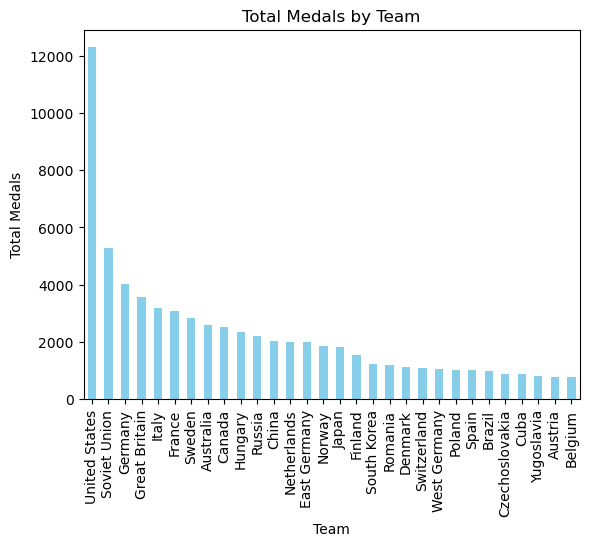

In [16]:
# Calculate the total number of medals for each team
medal_counts = df.groupby('Team')['Medal'].sum().sort_values(ascending=False).head(30)

# Create a bar plot
medal_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Team')
plt.ylabel('Total Medals')
plt.title('Total Medals by Team')

In [18]:
df.Age.describe()

count    266169.000000
mean         25.657364
std           6.494015
min          10.000000
25%          21.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

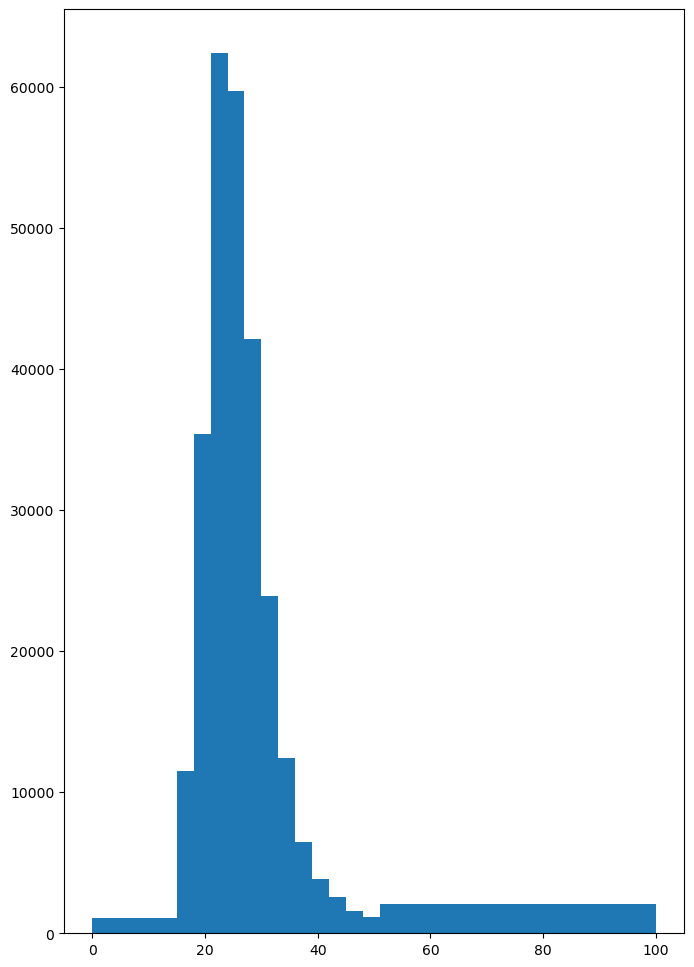

In [26]:
x_hist=df.Age
bins=(0, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 100)
plt.figure(figsize=(8,12))
plt.hist(x_hist, bins=bins)
plt.show()

C:\Users\moore\AppData\Local\Temp\ipykernel_35084\873143536.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=bins, labels=labels, right=False)
C:\Users\moore\AppData\Local\Temp\ipykernel_35084\873143536.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_count = filtered_df.groupby('Age Group')['Medal'].value_counts().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

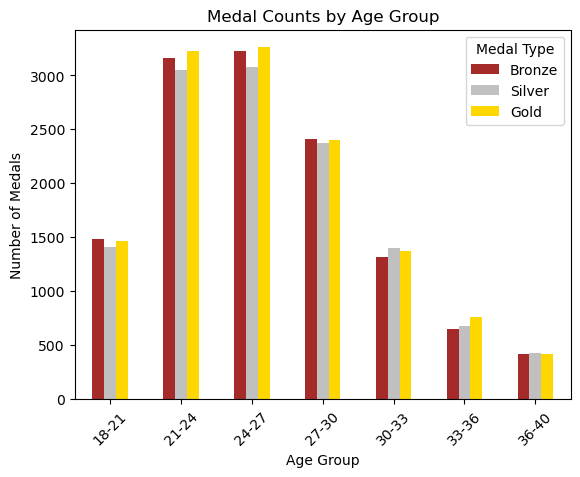

In [36]:
# Filter out rows where Medal is 0 (no medal)
filtered_df = df[df['Medal'] != 0]

# Define age bins and labels
bins = [18, 21, 24, 27, 30, 33, 36, 40]  # Define the bin edges
labels = ['18-21', '21-24', '24-27', '27-30', '30-33', '33-36', '36-40']  # Labels for the bins

# Create a new column with binned ages
filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=bins, labels=labels, right=False)

# Count the number of medals by age group
medal_count = filtered_df.groupby('Age Group')['Medal'].value_counts().unstack(fill_value=0)

# Create a multi-bar plot
plt.figure(figsize=(12, 8))
medal_count.plot(kind='bar', stacked=False, color=['brown', 'silver', 'gold'])

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Medals')
plt.title('Medal Counts by Age Group')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the plot
plt.legend(title='Medal Type', labels=['Bronze', 'Silver', 'Gold'])
plt.show()